# importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
 
Draw the inferences from the clusters obtained.


Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program.
 For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the
 last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting
 different segments for different types of mileage offers



ID --Unique ID


Balance--Number of miles eligible for award travel


Qual_mile--Number of miles counted as qualifying for Topflight status


cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:


1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000



Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months


Bonus_trans--Number of non-flight bonus transactions in the past 12 months


Flight_miles_12mo--Number of flight miles in the past 12 months


Flight_trans_12--Number of flight transactions in the past 12 months


Days_since_enrolled--Number of days since enrolled in flier program


Award--whether that person had award flight (free flight) or not


 

# Reading the data

In [2]:
AL=pd.read_csv(r"C:\Users\ABC\Downloads\EastWestAirlines ar.csv")

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
 
Draw the inferences from the clusters obtained.



In [3]:
AL.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [4]:
# droping an identity which is not useful
AL.drop(['ID#'],inplace=True,axis=1)

In [5]:
AL.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
# renaming target column name 
AL.rename(columns={'Award?':'Award'},inplace=True)

In [7]:
AL.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
# data information
AL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


from above , there are no any missing values in dataset

In [9]:
AL.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
map=AL.corr()
map

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


<AxesSubplot:>

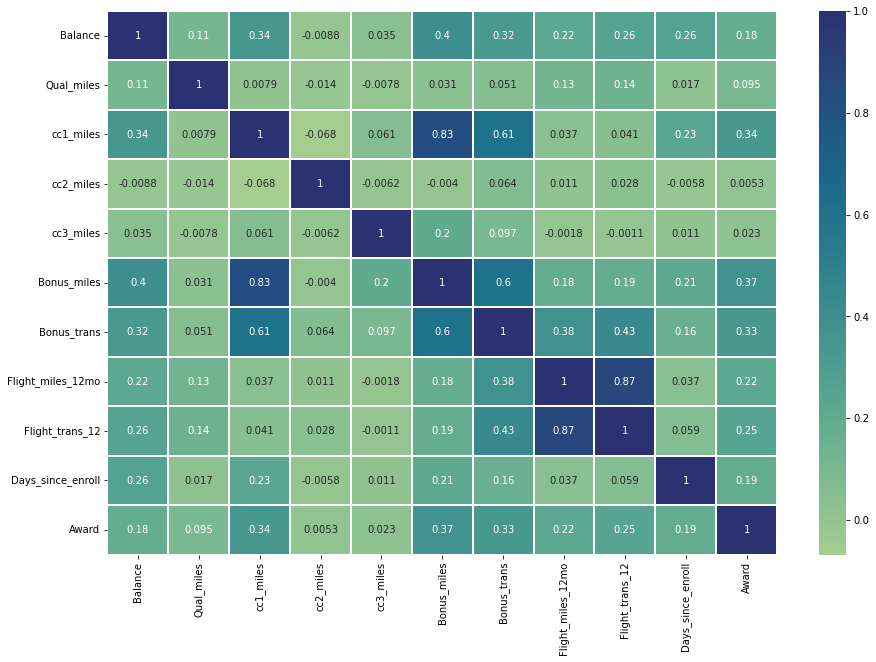

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data=map,annot= True, linewidths = 2, cmap = 'crest')

from heat map we can say that variables are not much correlated to each other.

In [12]:
for var in AL :
    print( AL[var].value_counts())

1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: Balance, Length: 3904, dtype: int64
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: Qual_miles, Length: 164, dtype: int64
1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64
1    3956
2      28
3      15
Name: cc2_miles, dtype: int64
1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64
0        475
500       66
1000      42
100       27
1500      25
        ... 
11981      1
28904      1
9850       1
52449      1
25447      1
Name: Bonus_miles, Length: 2734, dtype: int64
0     475
14    262
3     250
13    231
15    212
1     212
4     190
16    189
12    148
17    140
5     126
18    125
6     115
11    108
2     104
8     100
10     97
19     97
9      91
7      88
20     85
21     69
22     63


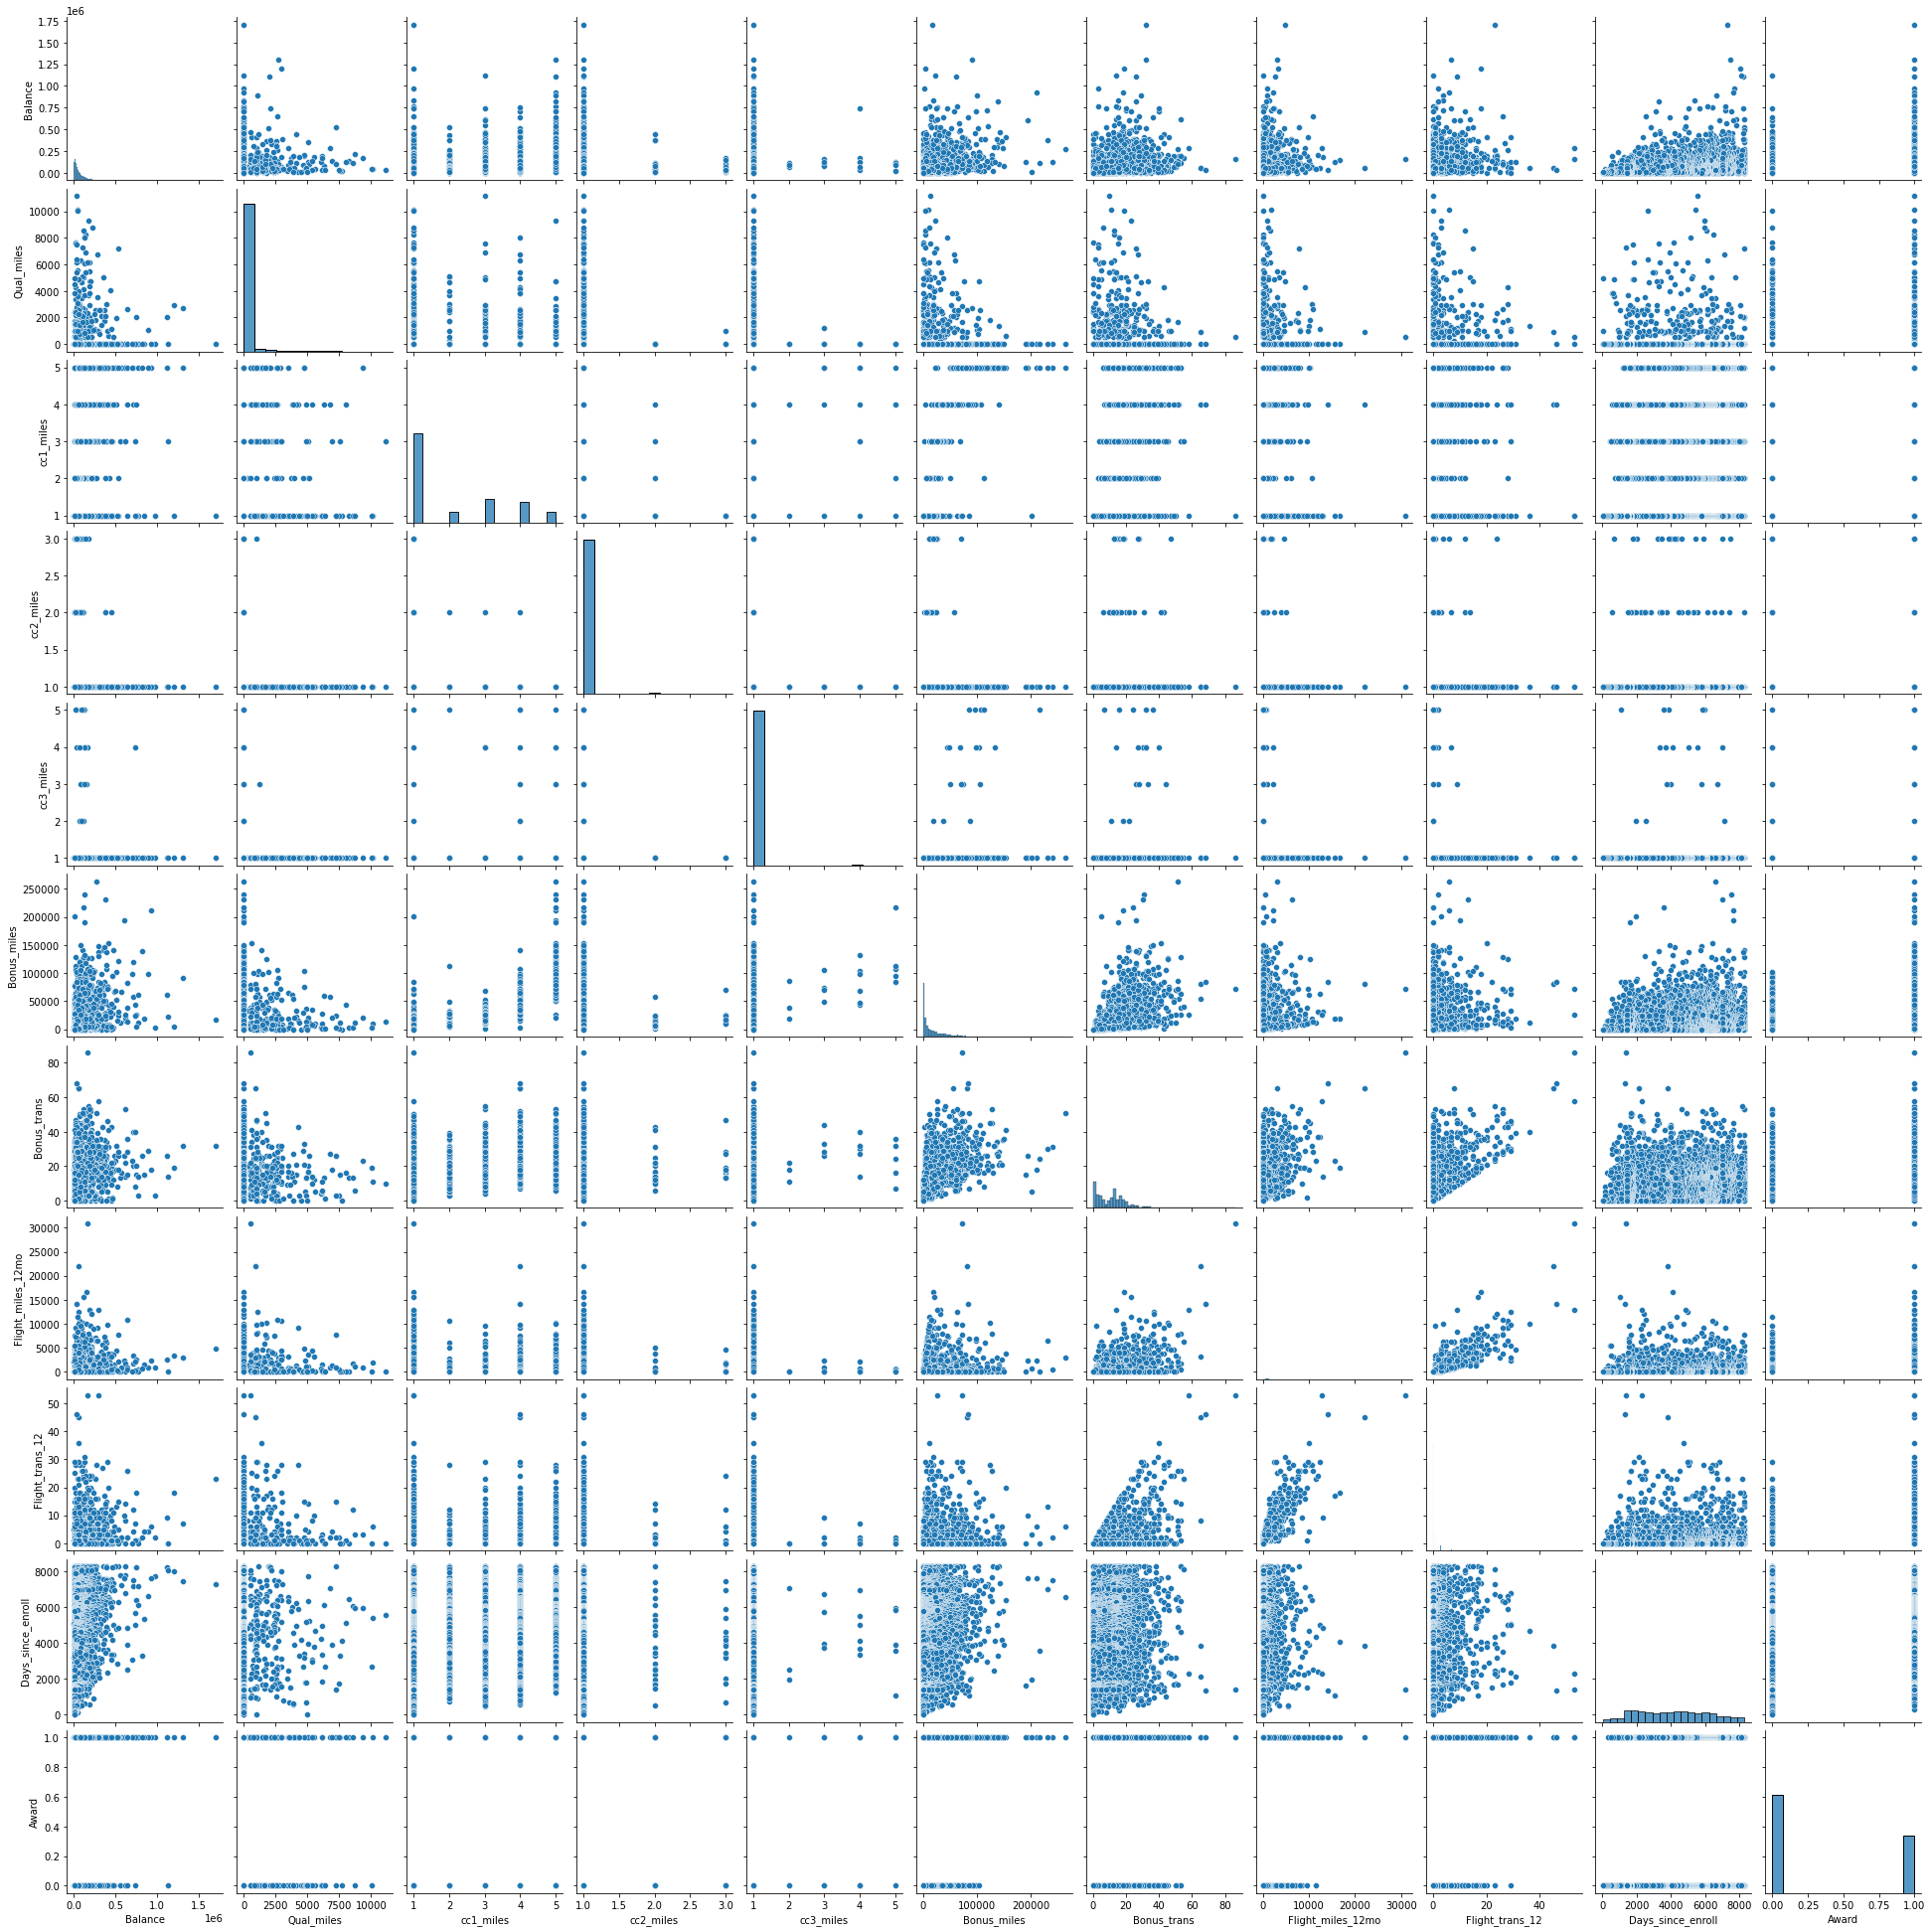

In [13]:
sns.pairplot(AL)

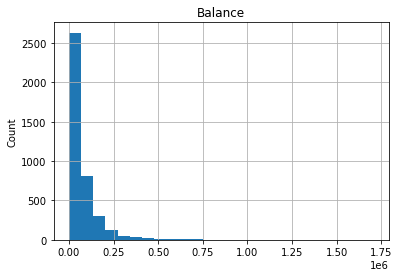

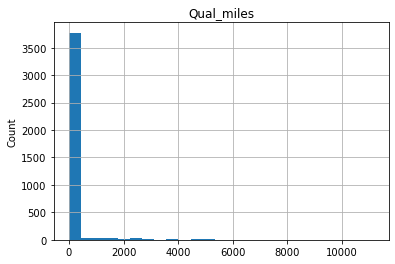

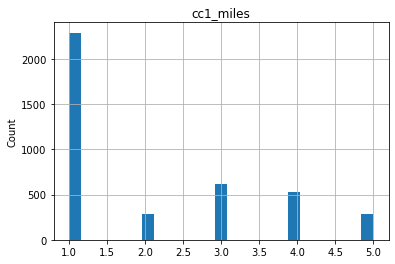

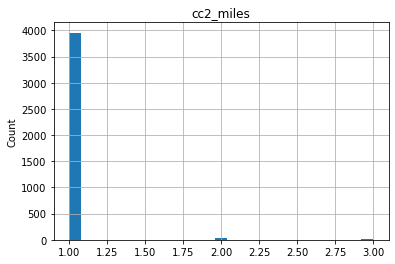

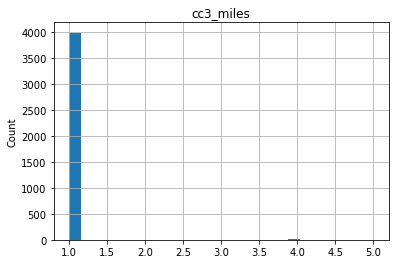

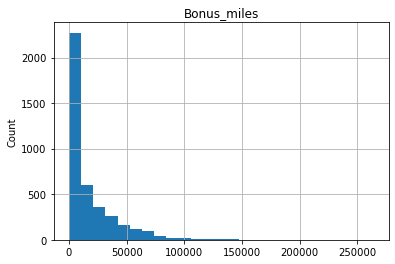

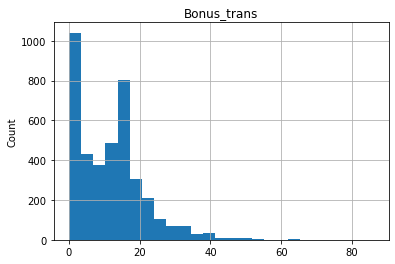

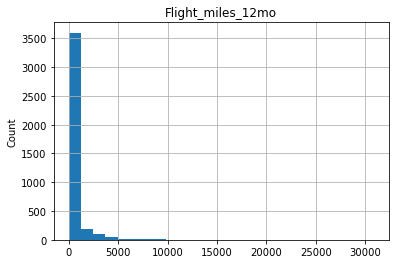

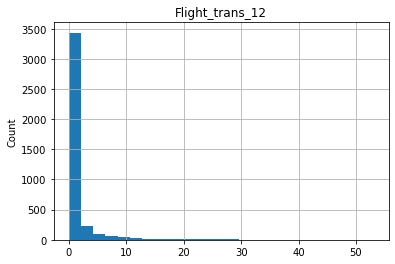

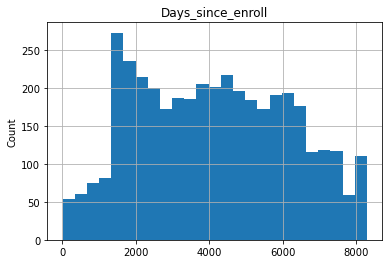

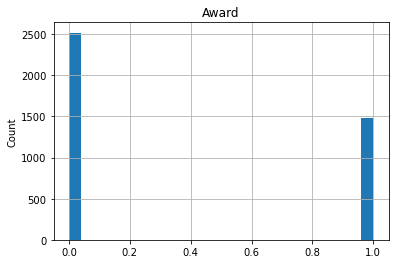

In [14]:
#checking distribution for all variable with histogram

for feature in AL.columns:
    data=AL
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

data is rightly skewed in all variable hence data is not normally distributed.

Balance


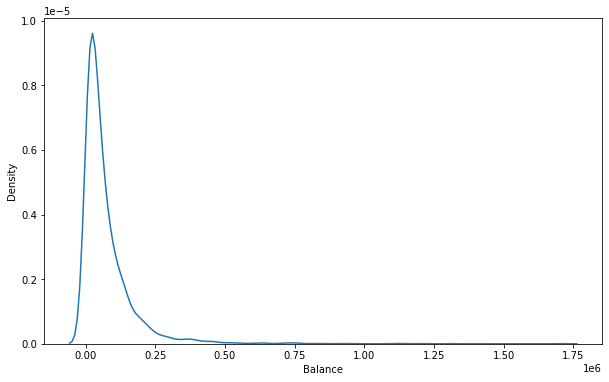

Qual_miles


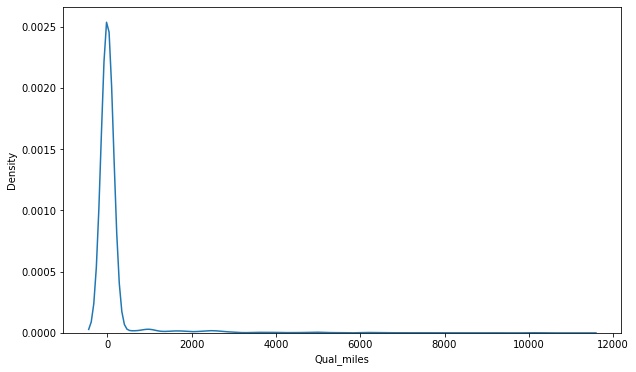

cc1_miles


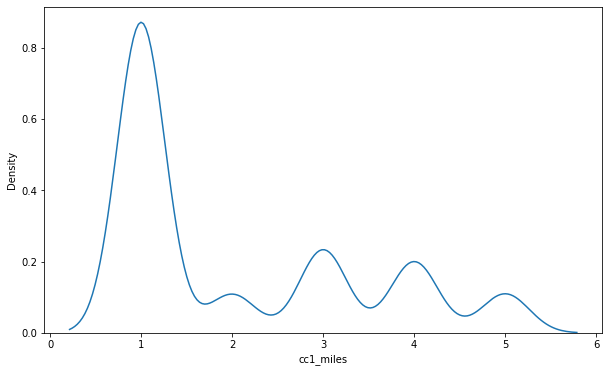

cc2_miles


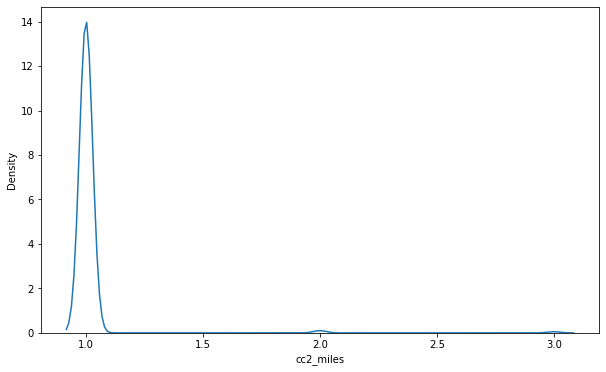

cc3_miles


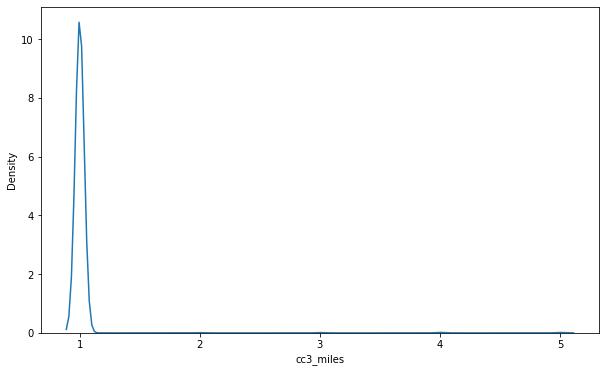

Bonus_miles


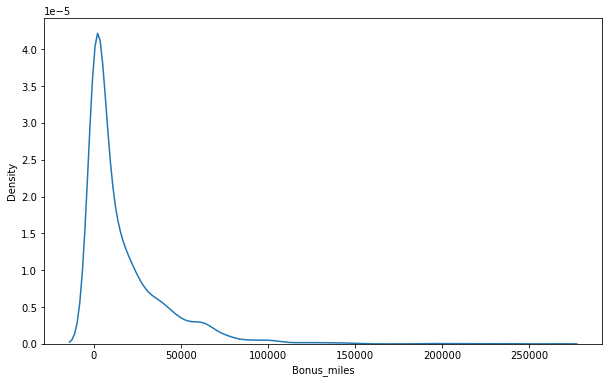

Bonus_trans


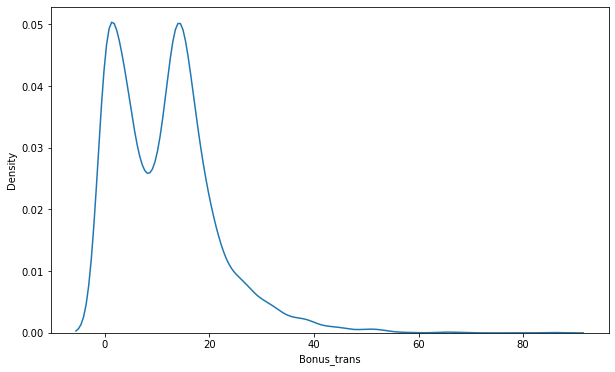

Flight_miles_12mo


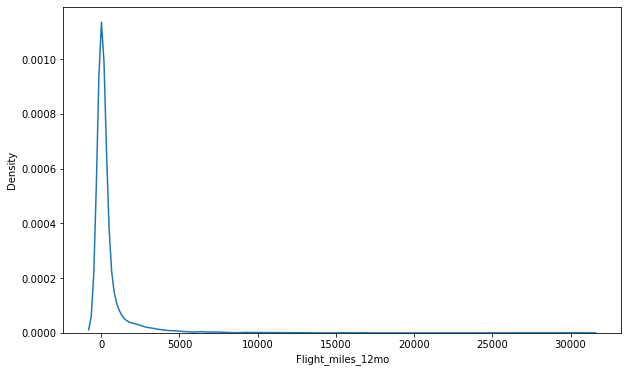

Flight_trans_12


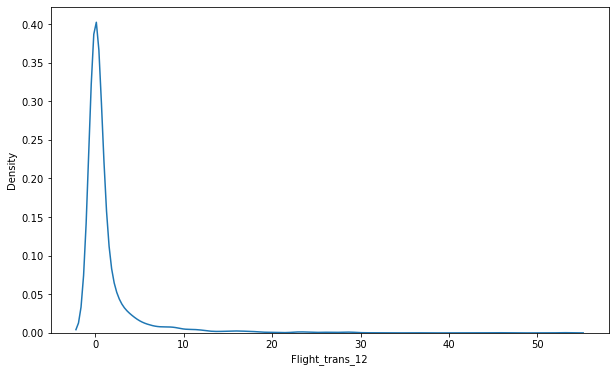

Days_since_enroll


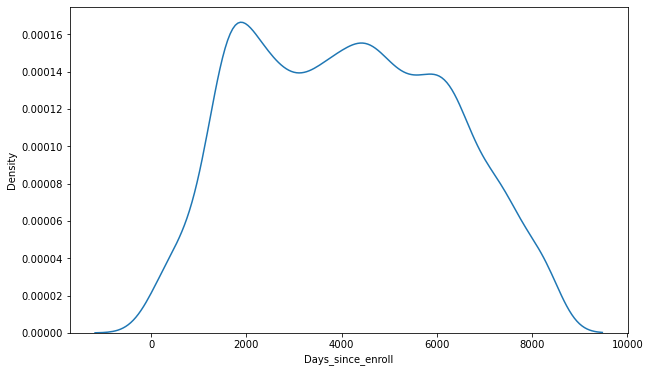

Award


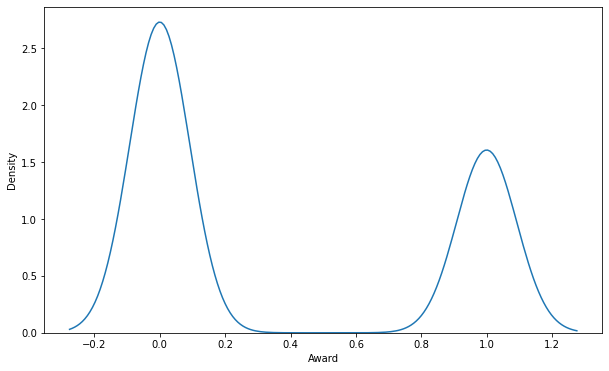

In [15]:
# checking with kernal density plot
for n in AL.columns:
    plt.figure(figsize=(10,6))
    print(n)
    sns.kdeplot(data[n])
    plt.show()

data is highly skewed on right side , some data points are away from mean dataset which drags the distribution towards tail.

Balance          AxesSubplot(0.125,0.125;0.168478x0.755)
Qual_miles    AxesSubplot(0.327174,0.125;0.168478x0.755)
cc1_miles     AxesSubplot(0.529348,0.125;0.168478x0.755)
cc2_miles     AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

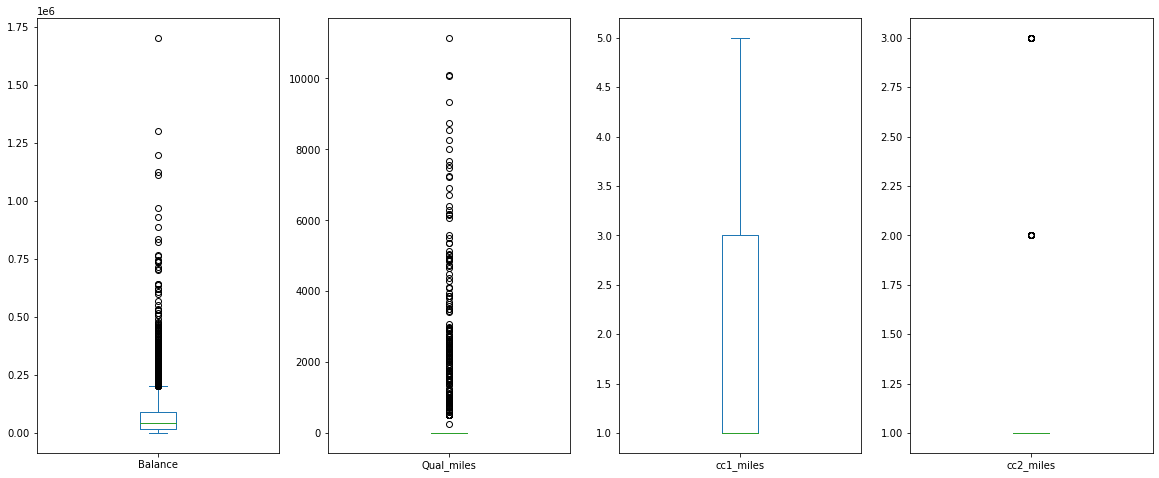

In [16]:
# checking for outliars with boxplot for each variable

AL.iloc[:,[0,1,2,3]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

cc3_miles               AxesSubplot(0.125,0.125;0.168478x0.755)
Bonus_miles          AxesSubplot(0.327174,0.125;0.168478x0.755)
Bonus_trans          AxesSubplot(0.529348,0.125;0.168478x0.755)
Flight_miles_12mo    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

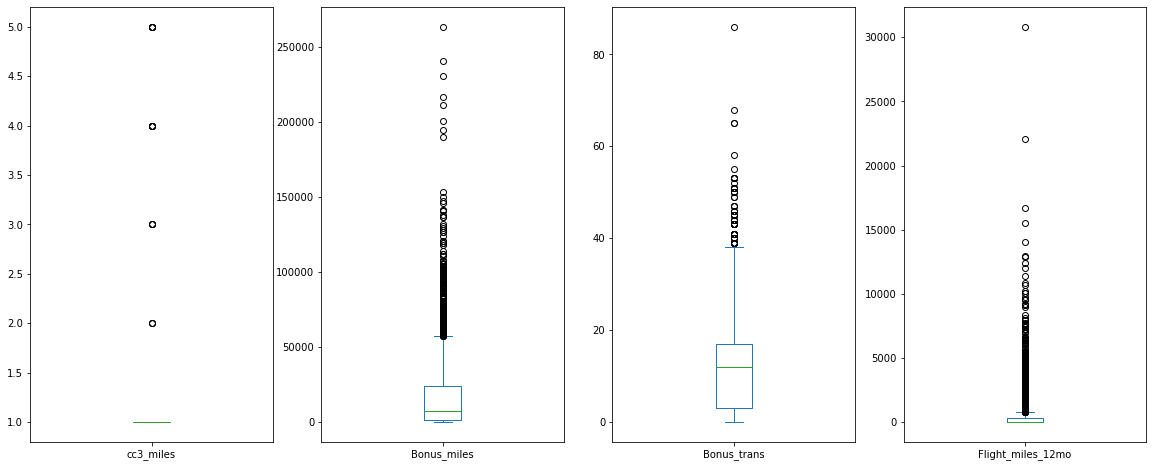

In [17]:
AL.iloc[:,[4,5,6,7]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

Flight_trans_12         AxesSubplot(0.125,0.125;0.227941x0.755)
Days_since_enroll    AxesSubplot(0.398529,0.125;0.227941x0.755)
Award                AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

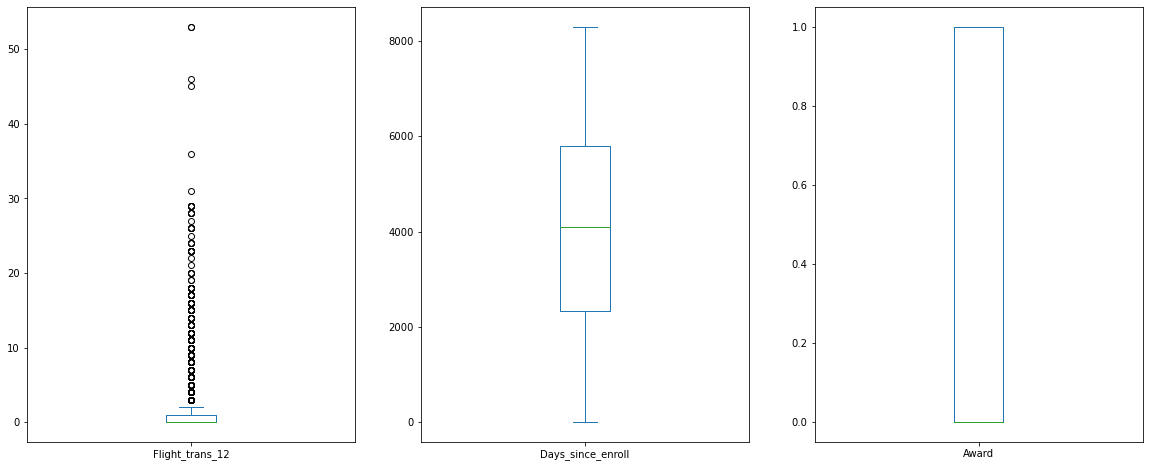

In [18]:
AL.iloc[:,[8,9,10]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

there are lot of outliars in whole data ,lets see how can they affect our model.

In [19]:
#checking for bias in target class
AL.Award.value_counts()

0    2518
1    1481
Name: Award, dtype: int64

<AxesSubplot:xlabel='Award', ylabel='count'>

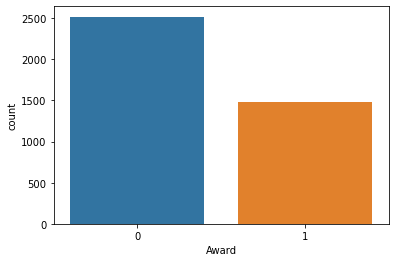

In [20]:
sns.countplot(data=AL,x='Award')

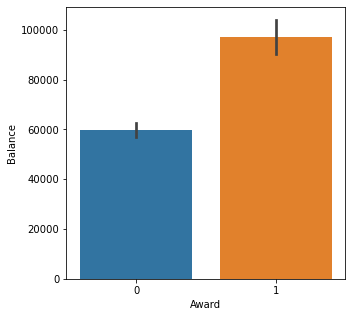

In [21]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
ax = sns.barplot(x='Award', y='Balance', data= AL)
plt.show()

that means above 60000 miles passenger geting a reward flight 

# normalizing the data

In [22]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [23]:
df_norm=norm_func(AL)

In [24]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [25]:
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# hierarchical clustering

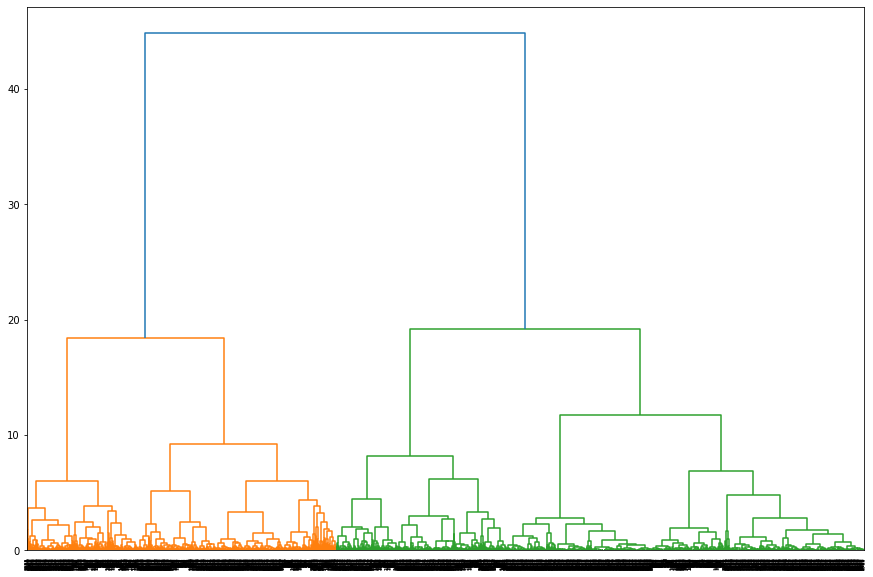

In [26]:
# clustering by using dendogram method
plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='ward'))

one of the most commaon drawback of heirarichal clustering is it dimensionaly cursed,it cannot handle large data, 
dendograms required lots of space to cluster the dataset

from above heirarchi cluster diagram we assume , best no. of cluster by looking most lenghthy vertical line without
cuts by any horizantal line is showing 2 (n=2)

but we dont know the exact value of no. of clusters , so we check for best no. of cluster, linkage method and there silhouette score.
choose the cluster no.and linkage  who has maximum silhouette score

In [27]:
from sklearn.metrics import silhouette_score
# always start number from 2 as there no any cluster with 1 
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(df_norm)
        silhouette_score1 = silhouette_score(df_norm, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4704091367949219
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4704091367949219
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645970851519768
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
For 

# here we can clearly say that , with n_cluster = 2 has maximum no. of silhouette score with 53 %

In [28]:
#hierarchi model
hc=AgglomerativeClustering(n_clusters=2 ,affinity = 'euclidean', linkage = 'ward')

In [29]:
#fitting the model 
hc.fit(df_norm)
# predict the cluster 

clu=hc.fit_predict(df_norm)
clu

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
# dataframe 
Clusters=pd.DataFrame(clu,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [31]:
# making and assigning a column in main dataset
df_norm['h_clusterid'] = Clusters
AL["Cluster"]=Clusters

In [32]:
AL

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
AL.Cluster.value_counts()

0    2518
1    1481
Name: Cluster, dtype: int64

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(df_norm,clu)

0.6422212342897226

In [35]:
AL.sort_values("Cluster")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2494,142152,0,3,1,1,19464,13,0,0,3088,0,0
2495,12713,0,1,1,1,0,0,0,0,3077,0,0
2496,28848,0,1,1,1,0,0,0,0,3069,0,0
2497,10940,0,1,1,1,0,0,0,0,3062,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2573,104632,0,1,1,1,26700,10,1200,7,2791,1,1
2570,10307,0,1,1,1,0,0,0,0,2808,1,1
1042,98213,0,5,1,1,68013,29,0,0,5755,1,1
2567,6345,0,2,1,1,7719,18,0,0,2805,1,1


In [36]:
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,0.016508,0.000000,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
2494,0.083382,0.000000,0.50,0.0,0.0,0.073815,0.151163,0.000000,0.000000,0.372076,0.0,0
2495,0.007457,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.370750,0.0,0
2496,0.016921,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.369785,0.0,0
2497,0.006417,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.368941,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2573,0.061374,0.000000,0.00,0.0,0.0,0.101257,0.116279,0.038940,0.132075,0.336267,1.0,1
2570,0.006046,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.338317,1.0,1
1042,0.057608,0.000000,1.00,0.0,0.0,0.257933,0.337209,0.000000,0.000000,0.693634,1.0,1
2567,0.003722,0.000000,0.25,0.0,0.0,0.029274,0.209302,0.000000,0.000000,0.337955,1.0,1


In [37]:
AL.groupby('Cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


# from above table we can easily segregate the new independnat input entry into a target class easily

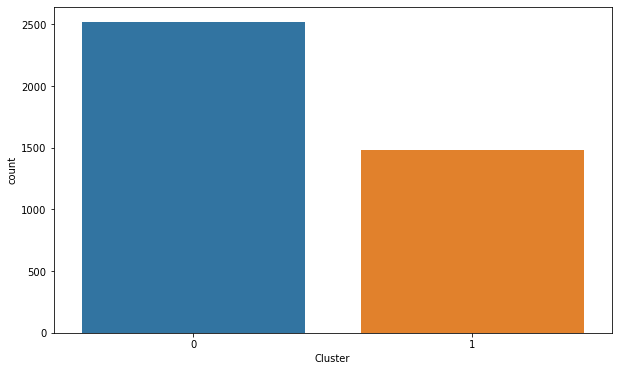

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cluster',data=AL)
plt.show()

# BY KMean CLustering

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [40]:
AR=pd.read_csv(r"C:\Users\ABC\Downloads\EastWestAirlines ar.csv")

In [41]:
AR.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [42]:
AR.drop(['ID#'], inplace=True,axis=1)

In [43]:
AR.rename(columns={'Award?':'Award'},inplace=True)

In [44]:
AR.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [45]:
AR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [46]:
AR.shape

(3999, 11)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
AR_scaled=scaler.fit_transform(AR)

In [48]:
AR_scaled.shape

(3999, 11)

# initially we can not assume or select no. of cluster for k mean clustering so we check for wcss(within cluster sum squared )and silhoette score 

In [49]:
wcss=[]
# assume n = 4 and check for wcss
kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(AR_scaled)

wcss.append(kmeans.inertia_)


In [50]:
wcss

[27162.166106124132]

In [51]:
# select range for n = 1 to 20 and check for wcss for the cluster
wcss=[]
for i in range (1,20):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(AR_scaled)

    wcss.append(kmeans.inertia_)

In [52]:
wcss

[43988.99999999999,
 35409.51662986129,
 30899.21640879058,
 27162.16610612414,
 23707.163884815593,
 21089.75687002387,
 19166.38904378935,
 17316.725861419516,
 15960.406001471114,
 14732.22988234744,
 13706.437043029622,
 12947.11222121467,
 12431.282300776244,
 11978.09416019512,
 11457.861622629429,
 11123.795503875028,
 10756.73396714099,
 10405.666259725165,
 10134.218972001308]

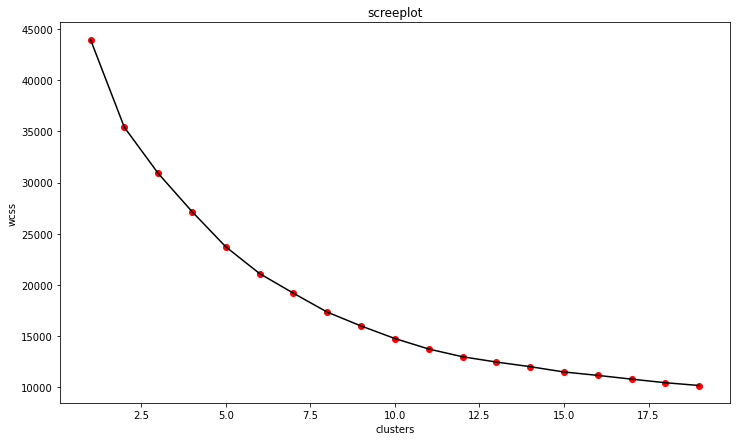

In [53]:
# potting elbow plot for wcss vs n_cluster to find no. of cluster  by visual method.
wcss=[]
for i in range (1,20):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(AR_scaled)

    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7))   

plt.plot(range(1,20),wcss,color = 'black')
plt.scatter(range(1,20),wcss,color='red')

plt.title('screeplot')
plt.xlabel('clusters')
plt.ylabel ('wcss')
plt.show()

where the wcss change drastically and then not deeps too much , which is the best no. of cluster 
near n = 7 or 8  wcss not decrease further so we chn choose this no, as n

In [54]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
from yellowbrick.cluster import KElbowVisualizer

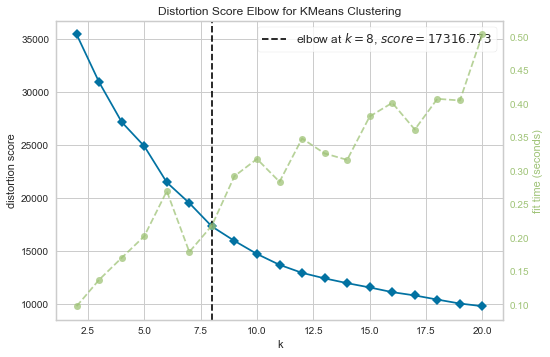

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
elbow=KElbowVisualizer(KMeans(),k=20)
elbow.fit(AR_scaled)
elbow.show()

checking by silhouette score method 

In [57]:
# With the elbow method, the ideal number of clusters to use was 8.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(AR_scaled)
    sil_score1= silhouette_score(AR_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.29843646540120594


# from above no. of cluster = 6 having maximum  silhouette score which is 0.33 , so we choose no. of clusster = 6 by silhouette score method 


In [58]:
# build model for n_cluster = 6 and fit the model
from sklearn.cluster import KMeans
clus=KMeans(n_clusters=6,random_state=42)
clus.fit(AR_scaled)

KMeans(n_clusters=6, random_state=42)

In [59]:
clus.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [60]:
#assigning to a dataframe 
AR['cluster']=clus.labels_
AR

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [61]:
#no. of passengers in each cluster 
AR.cluster.value_counts()

2    2483
0    1254
1     143
4      61
5      43
3      15
Name: cluster, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

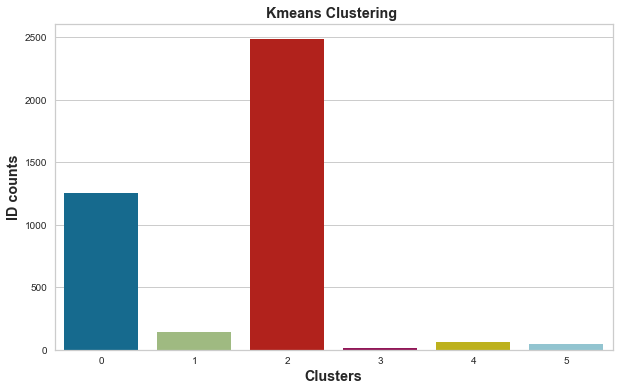

In [62]:
# count plot for passengers
plt.figure(figsize=(10,6))
sns.countplot(x='cluster', data = AR)
plt.title('Kmeans Clustering ',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('ID counts', fontsize='large', fontweight='bold')
plt.show

In [63]:
table=AR.groupby('cluster').agg(['mean'])
table

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,
0,117252.014354,60.495215,3.704944,1.000000,1.001595,39256.378788,18.760766,347.125997,1.037480,4896.791866,0.649123
1,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
2,43519.741845,42.457511,1.226742,1.000000,1.000403,4605.759162,6.825614,198.250503,0.616593,3696.446234,0.198953
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


# from above table ,we can easily segregate new independant point by comparing this 6 cluster variable values. 

# DBSCAN--

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [65]:
air=pd.read_csv(r"C:\Users\ABC\Downloads\EastWestAirlines ar.csv")

In [66]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<Figure size 1080x720 with 0 Axes>

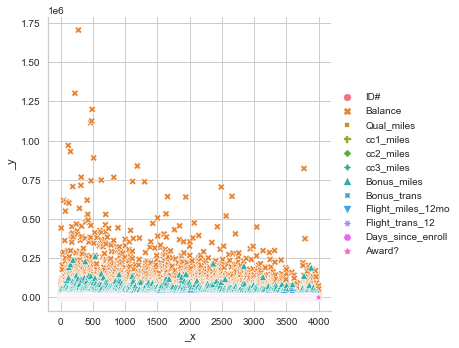

In [67]:
plt.figure(figsize=(15,10))
sns.relplot(data=air)
plt.show()

In [68]:
air.drop(['ID#'],inplace=True,axis=1)

In [69]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [70]:
air.rename(columns={'Award?':'Award'},inplace=True)

In [71]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [72]:
array=air.values
scaler=StandardScaler().fit(array)
x=scaler.transform(array)


In [73]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# dbscan is not used to make a cluster, it shows which are outliars and which are the core data points.but it follows the the path by making cluster to find which are outliars in dataset. 

Core — This is a point that has at least m points within distance n from itself.

Border — This is a point that has at least one Core point at a distance n. 

Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself. 

epsilon - radius of cirlce to select minimum samples 

min_sample - no. of samples reqiured to complete one circle with given epsilon

In [74]:
# dbscan with eps= 3 and min_sample = 6 
dbscan=DBSCAN(eps=3,min_samples=6)
dbscan.fit(x)

DBSCAN(eps=3, min_samples=6)

In [75]:
y=dbscan
y.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
labels= pd.DataFrame(y.labels_,columns=['data_points'])

labels

,data_points
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [77]:
labels.data_points.value_counts()

 0    3893
-1      68
 2      25
 1      13
Name: data_points, dtype: int64

In [78]:
n_clusters_ = len(set(y.labels_)) - (1 if -1 in y.labels_ else 0)
n_noise_ = list(y.labels_).count(-1)

In [79]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 68


In [80]:
s_score = silhouette_score(AR_scaled,y.labels_)

print("silhouette_score",s_score )

silhouette_score 0.5423021447133288


<function matplotlib.pyplot.show(close=None, block=None)>

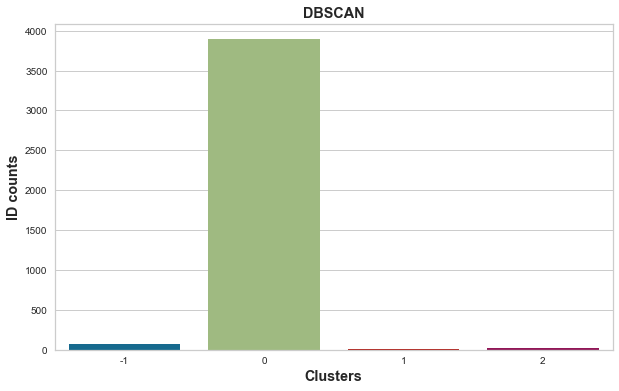

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(x='data_points', data = labels)
plt.title('DBSCAN',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('ID counts', fontsize='large', fontweight='bold')
plt.show

In [82]:
air['dbscan_labels']=y.labels_

In [83]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,dbscan_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [84]:
air.groupby('dbscan_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
dbscan_labels,,,,,,,,,,,
-1,297756.676471,1423.970588,3.029412,1.102941,1.720588,73235.250000,31.191176,4852.500000,13.308824,5085.897059,0.838235
0,70013.940149,123.165682,2.052145,1.000000,1.000000,16206.568199,11.223992,385.305163,1.170306,4104.280247,0.362702
1,41562.307692,0.000000,1.000000,3.000000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692
2,39187.040000,0.000000,1.120000,2.000000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000


-1 are outliars and remaining are the no. of  cluster, so  we get 3 cluster having differant classification in variable values. 

# CONCLUSION

Firstly we check the outliars with the help oh histogram and kernal density plot. 
Then we check for correlation between differant variables.
Then we scale the data for avoid noise from  the data.
Then i  used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

> From Hierarchical Clusterig we get max silhouette score with 53 % by no.cluster = 2 by using method = ward. 

> From KMeans Clusterig we get no.cluster =8 ,  by using ELBOW method 
      also we check with significant method (silhouette score ) we get s_score  33% with no.cluster =6 
    
> From dbscan we check for outliars in which we have 68 datapoints are showuing outliars and rest data points 
are core data points with 3 different cluster   